BRAIN STROKE PREDICTION USING LOGISTIC REGRESSION(WITH 1000 records and 89% ACCURACY)

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importing dataset
data = pd.read_csv("brain_stroke.csv")
print("\nHEAD:\n")
data.head(10)


HEAD:



,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


DATA VISUALIZATION

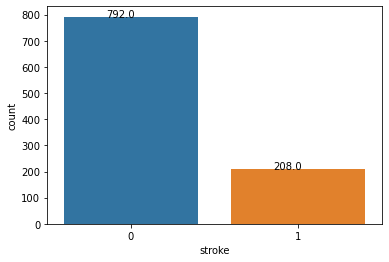

In [3]:
#determining number of people who got stroke

a=sns.countplot(x="stroke",data=data)
for p in a.patches:
    a.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

In [4]:
data['stroke'].value_counts()

0    792
1    208
Name: stroke, dtype: int64

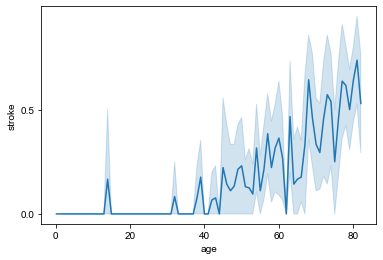

In [5]:
#line graph showing how the risk of stroke rises with age
sns.lineplot(x="age",y="stroke",data=data)
sns.set_style("whitegrid")
sns.set_context("poster")
plt.show()

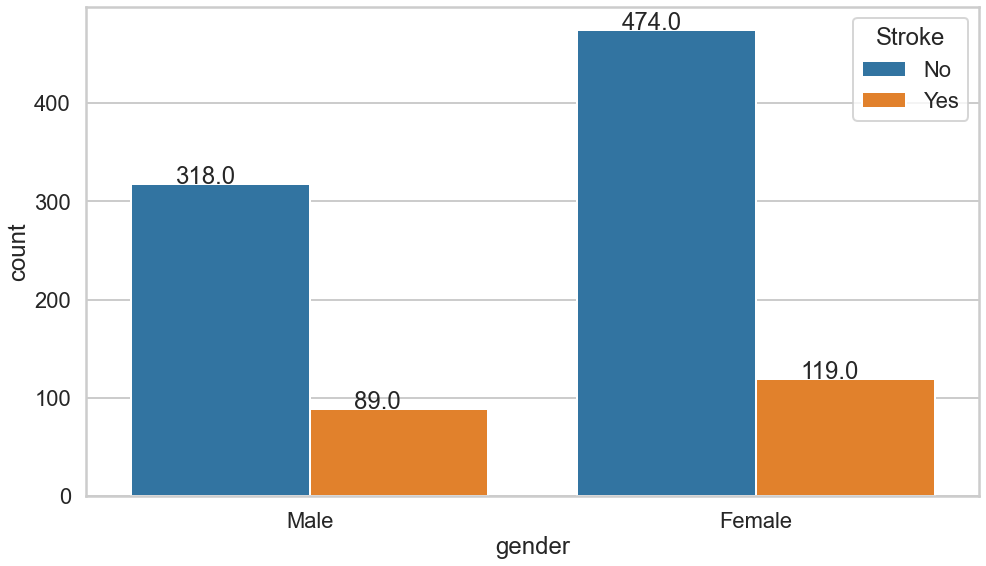

In [6]:
#gender-based countplot indicating whether or not patients had strokes
plt.figure(figsize=(16,9))
a=sns.countplot(x ='gender', hue = "stroke", data = data)
for p in a.patches:
    a.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.1, p.get_height()+0.01))
plt.legend(['No','Yes'],title="Stroke")
plt.show()

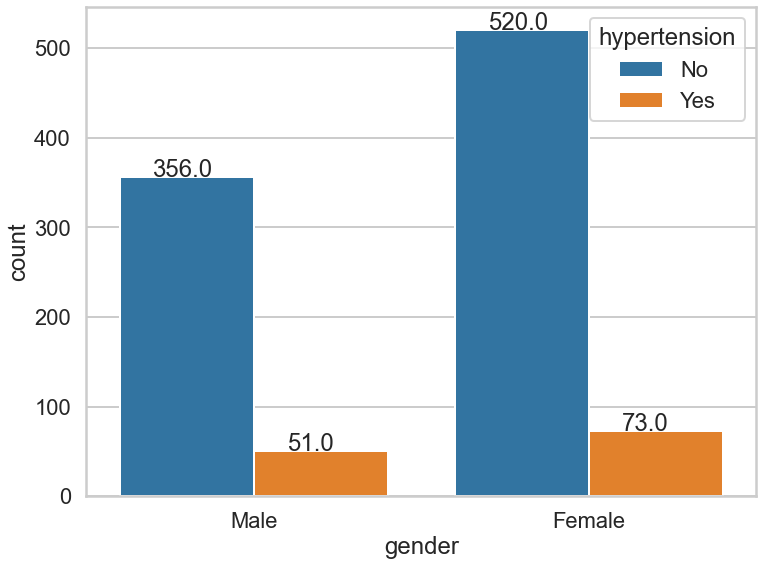

In [7]:
#gender-based countplot indicating whether or not patients have hypertension
plt.figure(figsize=(12,9))
a=sns.countplot(x ='gender', hue = "hypertension", data = data)
for p in a.patches:
    a.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.01))
plt.legend(['No','Yes'],title="hypertension")
plt.show()

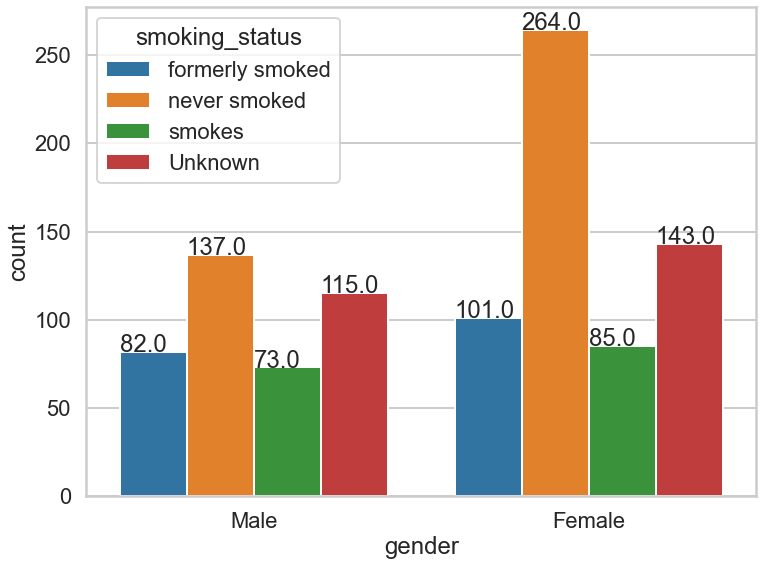

In [8]:
#gender-based countplot indicating their smoking status
plt.figure(figsize=(12,9))
a=sns.countplot(x ='gender', hue = "smoking_status", data = data)
for p in a.patches:
    a.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.01))
plt.show()

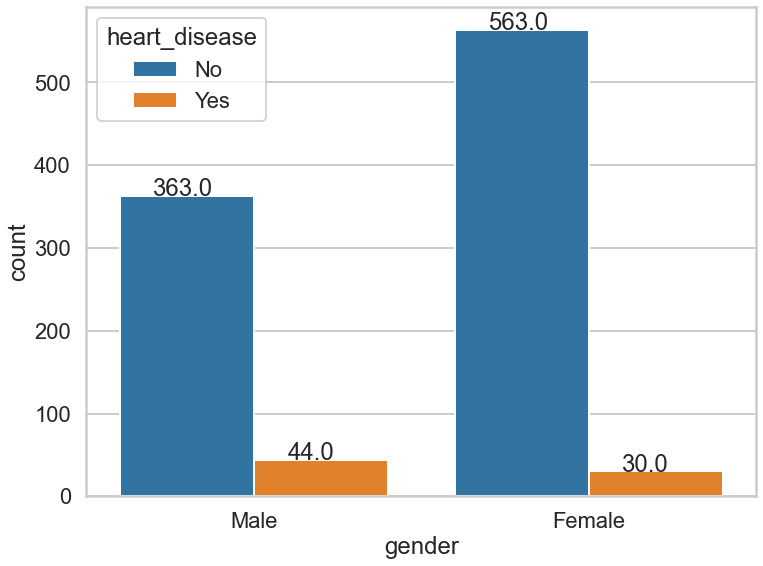

In [9]:
#gender-based countplot indicating whether or not patients have heart disease
plt.figure(figsize=(12,9))
a=sns.countplot(x ='gender', hue = "heart_disease", data = data)
for p in a.patches:
    a.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.01))
plt.legend(['No','Yes'],title="heart_disease")
plt.show()

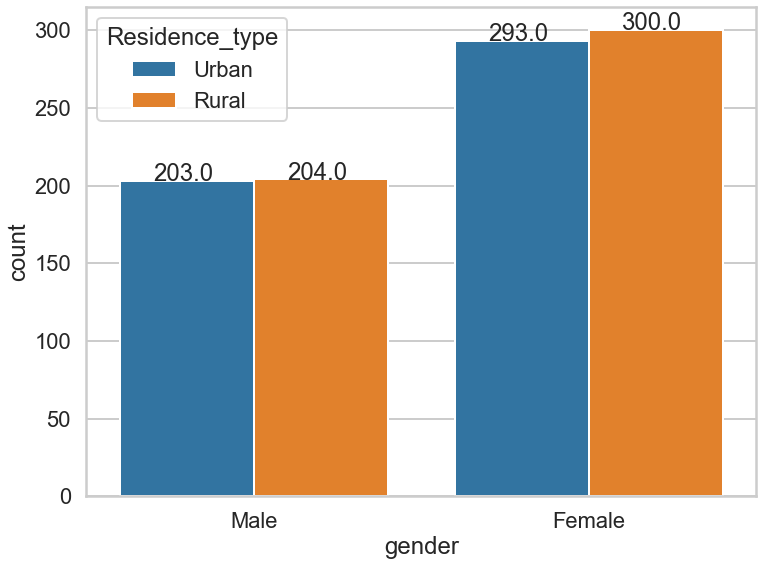

In [10]:
#gender-based countplot reflecting their type of residence
plt.figure(figsize=(12,9))
a=sns.countplot(x ='gender', hue = "Residence_type", data = data)
for p in a.patches:
    a.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.01))
plt.show()

DATA PREPROCESSING

In [11]:
data.shape

(1000, 11)

In [12]:
print("\nINFO:\n")
data.info()


INFO:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             1000 non-null   object 
 1   age                1000 non-null   float64
 2   hypertension       1000 non-null   int64  
 3   heart_disease      1000 non-null   int64  
 4   ever_married       1000 non-null   object 
 5   work_type          1000 non-null   object 
 6   Residence_type     1000 non-null   object 
 7   avg_glucose_level  1000 non-null   float64
 8   bmi                1000 non-null   float64
 9   smoking_status     1000 non-null   object 
 10  stroke             1000 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 86.1+ KB


In [13]:
print("\nDESCRIBE:\n")
data1 = data
data1.describe()


DESCRIBE:



,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,47.618120,0.124000,0.074000,110.428490,29.151400,0.20800
std,22.752331,0.329746,0.261902,48.744997,6.764528,0.40608
min,0.240000,0.000000,0.000000,55.250000,14.400000,0.00000
25%,30.000000,0.000000,0.000000,77.635000,24.375000,0.00000
50%,51.000000,0.000000,0.000000,94.295000,28.400000,0.00000
75%,66.000000,0.000000,0.000000,119.115000,33.200000,0.00000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.00000


In [14]:
#checking for null value
print(data.isna())

     gender    age  hypertension  heart_disease  ever_married  work_type  \
0     False  False         False          False         False      False   
1     False  False         False          False         False      False   
2     False  False         False          False         False      False   
3     False  False         False          False         False      False   
4     False  False         False          False         False      False   
..      ...    ...           ...            ...           ...        ...   
995   False  False         False          False         False      False   
996   False  False         False          False         False      False   
997   False  False         False          False         False      False   
998   False  False         False          False         False      False   
999   False  False         False          False         False      False   

     Residence_type  avg_glucose_level    bmi  smoking_status  stroke  
0             F

In [15]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [17]:
#LabelEncoder can be used to normalize labels. It can also be used to transform non-numerical labels to numerical labels.
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

gender=enc.fit_transform(data['gender'])
data['gender']=gender

ever_married=enc.fit_transform(data['ever_married'])
data['ever_married']=ever_married

work_type=enc.fit_transform(data['work_type'])
data['work_type']=work_type

Residence_type=enc.fit_transform(data['Residence_type'])
data['Residence_type']=Residence_type

smoking_status=enc.fit_transform(data['smoking_status'])
data['smoking_status']=smoking_status

data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1


SPLITTING DATA FOR TEST AND TRAIN

In [18]:
x = data.iloc[:,0:10]
y = data.iloc[:,10:11]

x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,1,1,228.69,36.6,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2
2,0,49.0,0,0,1,1,1,171.23,34.4,3
3,0,79.0,1,0,1,2,0,174.12,24.0,2
4,1,81.0,0,0,1,1,1,186.21,29.0,1


In [19]:
y.head()

,stroke
0,1
1,1
2,1
3,1
4,1


LOGISTIC REGRESSION

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

#Applying ML model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=4000) #max_iter is for maximum number of iterations,by default max_iter value is 1000

#training the data
logreg.fit(x_train,y_train['stroke'])

#predciting score
score = logreg.score(x_test,y_test)
print("Prediction score is: ",score)


Prediction score is:  0.89


In [24]:
a = logreg.score(x_test,y_test)
print("Test Accuracy: ",(a*100), "%")

Test Accuracy:  89.0 %


In [25]:
y_pred=logreg.predict(x_test)
print("Predicted values: ",y_pred)
print("Actual Values: ",y_test)

Predicted values:  [0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
Actual Values:       stroke
993       0
859       0
298       0
553       0
672       0
..      ...
679       0
722       0
215       0
653       0
150       1

[200 rows x 1 columns]


In [26]:
#recall and precision

from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test,y_pred,zero_division=1)
recall = recall_score(y_test,y_pred)
print("Precision: ",precision)
print("Recall: ",recall)

Precision:  0.6666666666666666
Recall:  0.42857142857142855


CONFUSION MATRIX

In [27]:
from sklearn.metrics import confusion_matrix
cmat=confusion_matrix(y_test,y_pred)
print(cmat)

[[166   6]
 [ 16  12]]


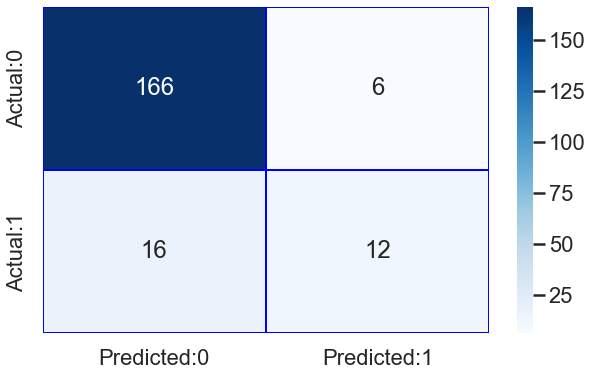

In [28]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
cmat = pd.DataFrame(data = cmat,columns = ['Predicted:0', 'Predicted:1'],index =['Actual:0',
'Actual:1'])
plt.figure(figsize = (10, 6))
sns.heatmap(cmat, annot = True, fmt = 'd', cmap = "Blues", linecolor="Blue", linewidths=1.5)
plt.show()

In [30]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  166
False Positives:  6
False Negatives:  16
True Positives:  12


In [31]:
#classification report
from sklearn.metrics import classification_report
target_names = ['Person does not have chances of stroke', 'Person has chances of stroke']
print(classification_report(y_test,y_pred, target_names=target_names))

                                        precision    recall  f1-score   support

Person does not have chances of stroke       0.91      0.97      0.94       172
          Person has chances of stroke       0.67      0.43      0.52        28

                              accuracy                           0.89       200
                             macro avg       0.79      0.70      0.73       200
                          weighted avg       0.88      0.89      0.88       200

